In [0]:
import cv2
import pickle
import os.path
import matplotlib.pyplot as plt
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout
from keras import backend as k
from keras.layers.normalization import BatchNormalization
from keras.models import model_from_json
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

In [5]:
!git clone https://github.com/magus96/BCDCNN.git
  

fatal: destination path 'BCDCNN' already exists and is not an empty directory.


In [6]:
cd '/content/BCDCNN/'


/content/BCDCNN


In [0]:
from helpers import resize_to_fit
path='/content/BCDCNN/Dataset'
data=[]
labels=[]
for image_file in paths.list_images(path):
    image=cv2.imread(image_file)
    image=resize_to_fit(image,128,128)
    label=image_file.split(os.path.sep)[-2]
    data.append(image)
    labels.append(label)
    
    

In [8]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(np.expand_dims(labels, axis=1))

print(data.shape)
print(labels.shape)

(1482, 128, 128, 3)
(1482, 1)


In [9]:
lb=LabelBinarizer().fit(labels)
labels=lb.transform(labels)
print(labels.shape)

(1482, 1)


In [0]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=109)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1185, 128, 128, 3)
(297, 128, 128, 3)


In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4

model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), strides=(2, 2)))
  
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print(model.summary())
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
__________

In [0]:
batch_size=64
epochss=20


In [14]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=batch_size,epochs=epochss)


Train on 1185 samples, validate on 297 samples
Epoch 1/20
1185/1185 [==============================] - 12s 10ms/step - loss: 0.7854 - acc: 0.5207 - val_loss: 0.6875 - val_acc: 0.5051
Epoch 2/20
1185/1185 [==============================] - 5s 5ms/step - loss: 0.6849 - acc: 0.5966 - val_loss: 0.6344 - val_acc: 0.6936
Epoch 3/20
1185/1185 [==============================] - 5s 5ms/step - loss: 0.5776 - acc: 0.7435 - val_loss: 0.5270 - val_acc: 0.7778
Epoch 4/20
1185/1185 [==============================] - 5s 5ms/step - loss: 0.4464 - acc: 0.8169 - val_loss: 0.3137 - val_acc: 0.8889
Epoch 5/20
1185/1185 [==============================] - 5s 5ms/step - loss: 0.2804 - acc: 0.8895 - val_loss: 0.1505 - val_acc: 0.9461
Epoch 6/20
1185/1185 [==============================] - 5s 5ms/step - loss: 0.1997 - acc: 0.9215 - val_loss: 0.2584 - val_acc: 0.8923
Epoch 7/20
1185/1185 [==============================] - 5s 5ms/step - loss: 0.1677 - acc: 0.9376 - val_loss: 0.4001 - val_acc: 0.8923
Epoch 8/20
11

In [15]:
model_json=model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)
model.save_weights("model.h5")
print("saved model to disk")
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
  


saved model to disk
Loaded model from disk


In [0]:
from helpers import resize_to_fit
path='/content/BCDCNN/testdata'
data1=[]
labels1=[]
for image_file in paths.list_images(path):
    image=cv2.imread(image_file)
    image=resize_to_fit(image,128,128)
    label=image_file.split(os.path.sep)[-2]
    data1.append(image)
    labels1.append(label)
    
    

In [17]:
data1 = np.array(data1, dtype="float") / 255.0
labels1 = np.array(np.expand_dims(labels1, axis=1))

print(data1.shape)
print(labels1.shape)

(98, 128, 128, 3)
(98, 1)


In [18]:
lb=LabelBinarizer().fit(labels1)
labels1=lb.transform(labels1)
print(labels1.shape)

(98, 1)


In [32]:
scores = model.evaluate(data1,labels1, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

98/98 [==============================] - 0s 2ms/step
Test loss: 0.0015130881498519055
Test accuracy: 1.0


In [0]:
y_preds=model.predict(data1)

In [0]:
y_classes = y_preds.argmax(axis=-1)

In [22]:
print(y_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
y_classes1=[98]
for i in range(len(y_classes)):
  if y_classes[i]==0:
    y_classes1.append("benign")
  elif y_classes[i]==1:
    y_classes1.append("malignant")
print(y_classes1[50]) 

malignant


-----actual class-----
malignant
-----predicted label----
malignant
-----actual class-----
malignant
-----predicted label----
malignant
-----actual class-----
malignant
-----predicted label----
malignant
-----actual class-----
malignant
-----predicted label----
malignant


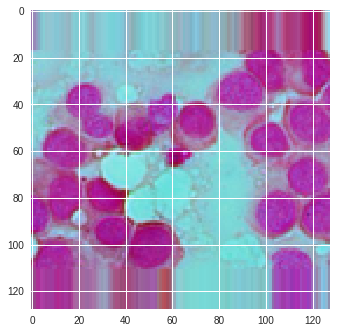

In [24]:
import random
for i in range(4):
  j=random.randint(0,97)
  if labels1[j]==0:
     a_class="benign"
  else:
     a_class="malignant"
  plt.imshow(data1[j])
  print("-----actual class-----")
  print(a_class)
  print("-----predicted label----")
  print(y_classes1[j])


----actual class-----
malignant
----predicted class---
malignant


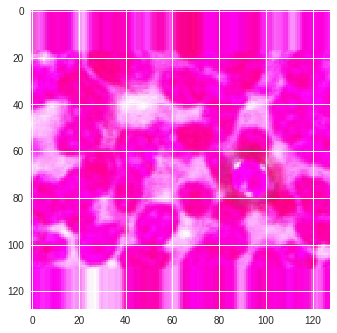

In [31]:
plt.imshow(data1[50])
if labels1[50]==0:
   a_class="benign"
else:
  a_class="malignant"
print("----actual class-----")
print(a_class)
print("----predicted class---")
print(y_classes1[50])

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(labels1, y_classes, pos_label=2)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


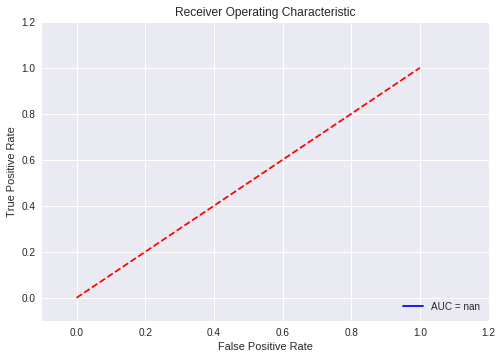

In [27]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()